#### 1.โหลดข้อมูลตัวอย่างจากไฟล์ csv โดยใช้ pandas

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data
df = pd.read_csv('datasets/salary_food.csv')

df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


##### 2. ตรวจสอบการกระจายของข้อมูลด้วยแผนภาพ Scatter Plot

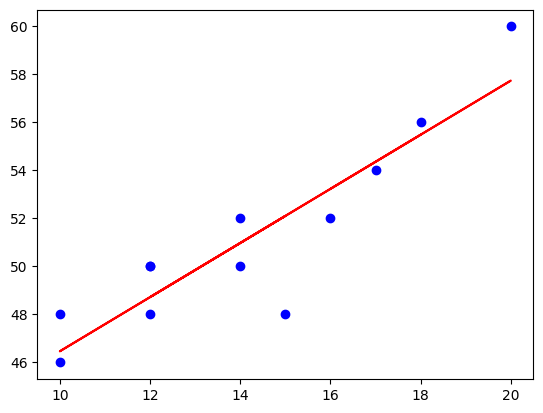

In [24]:
# Scatter plot
plt.scatter(df['income'], df['food_expenses'], color='blue')

# หาความชัน (slop)
m, b = np.polyfit(df['income'], df['food_expenses'], 1)

# สร้างเส้นตรง
plt.plot(df['income'], m*df['income'] + b, '-' , color='red')

plt.show()

##### 3.แบ่งข้อมูลสำหรับสอน (Train) และทดสอบ (Test)

In [25]:
# x, y for simple regression
x = df[['income']]
y = df['food_expenses']

# Split the data into training/testing sets
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[52 60 50 52 50 48 48 46 48 50]
[[17]
 [18]]
[54 56]


#### 4.สอน Model (Training Model)

In [31]:
# create model object linear regression
model = LinearRegression()

# train the model with the data
model.fit(x_train, y_train)

LinearRegression()

#### 5.การทำนายผลจาก Regression Model (Predicting)

In [33]:
# ตัวอย่างการทำนายผล
print("Predict: ", model.predict(x_test))

Predict:  [54.3030303  55.41818182]


##### 6. การประเมินผลโมเดล (Model Evaluation)

In [37]:
# ดูค่า coefficient และ intercept
print('Coefficient:', model.coef_) # ค่า coefficient  #b 
print('Intercept:', model.intercept_) # ค่า intercept #หรือค่าที่ตัดแกน y #a

# ดูค่าความแม่นยำของโมเดล โดยใช้ค่า R-squared
# R-Square ของการทำนาย มีค่าตั้งแต่ 0.1 - 1 (x100) ค่าที่ใกล้ 1 คือ การทำนายที่ดี
print('R-squared:', model.score(x_test, y_test))
print("ความแม่นยำ %.2f%%" % (model.score(x_test, y_test) * 100))

Coefficient: [1.11515152]
Intercept: 35.345454545454544
R-squared: 0.7848301193755755
ความแม่นยำ 78.48%


#### 7.การวาดกราฟแสดงผลลัพธ์ของโมเดล

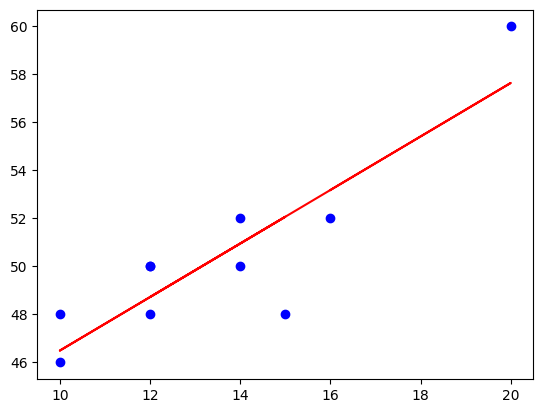

In [40]:
# plotting the training set
plt.scatter(x_train, y_train, color = 'blue')

# plotting the predicted values
plt.plot(x_train, model.predict(x_train), color = 'red')

# displaying the graph
plt.show()

##### 8. บันทึกโมเดล และนำไปใช้งาน Model export

In [43]:
# ติดตั้ง library สำหรับการ export model
! pip install joblib

from joblib import dump

# บันทึก model ไว้ในรูปแบบ .joblib
dump(model, 'salary_food_model.joblib')

['salary_food_model.joblib']

#### 9. โหลดโมเดลที่บันทึกไว้มาใช้งาน

In [49]:
from joblib import load

# โหลด model จากไฟล์ .joblib
myModel = load('salary_food_model.joblib')

# ทดสอบโมเดล โดยให้เงินเดือนเท่ากับ 23000 บาท และ 35000 บาท
myModel.predict([[17],[18],[30],[60]])

array([ 54.3030303 ,  55.41818182,  68.8       , 102.25454545])